## Preliminary Data Processing

In this initial step, we load the dataset `XYZloan_default_selected_vars.csv` we previously used from homework 3. Loading the dataset into a pandas DataFrame allows us to inspect its structure, ensuring that all variables are correctly formatted and ready for further exploration and modeling.

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/home/ritwikgoel/Downloads/john.csv')

df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'id'])

# Check the first few rows to understand the dataset
df.head()


,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


### Exploratory Data Analysis - Data Structure and Summary Statistics

To begin our analysis, we examine the overall structure and characteristics of the dataset.

we assess the data types of each variable and verify that there are no missing values. This inspection is crucial to identify any potential issues with data types that may impact modeling later on.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0] # Shows columns with missing values


TD022    19598
TD023     7663
TD024     3694
TD025     2550
TD026     1846
TD027     1697
TD028     1636
TD029     1630
TD044    79997
TD048    79999
TD051    79995
TD054    79988
TD055    79999
TD061    79990
TD062    79999
PA022      381
PA023      381
PA028      381
PA029      381
PA030      381
PA031      381
CD008      381
CD018      381
CD071      381
CD072      381
CD088      381
CD100      381
CD101      381
CD106      381
CD107      381
CD108      381
CD113      381
CD114      381
CD115      381
CD117      381
CD118      381
CD120      381
CD121      381
CD123      381
CD130      381
CD131      381
CD132      381
CD133      381
CD135      381
CD136      381
CD137      381
CD152      381
CD153      381
CD160      381
CD162      381
CD164      381
CD166      381
CD167      381
CD169      381
CD170      381
CD172      381
CD173      381
MB005     2793
dtype: int64

In [5]:
# Drop the specified columns from the dataframe
columns_to_remove = ['TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062']
df = df.drop(columns=columns_to_remove)

In [6]:
# Check the unique values of the columns (first 39)
df.nunique().head(39)

loan_default        2
AP001              37
AP002               2
AP003               5
AP004               4
AP005           55057
AP006               4
AP007               5
AP008               5
AP009               2
TD001              21
TD002              12
TD005              25
TD006              21
TD009              39
TD010              30
TD013              46
TD014              34
TD015               8
TD022               5
TD023              11
TD024              16
TD025               1
TD026               1
TD027               1
TD028               1
TD029               1
CR004               4
CR005               6
CR009           25883
CR012               1
CR015               5
CR017               8
CR018               9
CR019              12
PA022             172
PA023             167
PA028            5142
PA029            4120
dtype: int64

In [7]:
# Check the unique values of the columns (last 39)
df.nunique().tail(39)

PA031     4323
CD008    31165
CD018     2026
CD071      513
CD072      507
CD088      648
CD100      488
CD101      317
CD106      625
CD107      433
CD108      392
CD113       62
CD114       92
CD115      456
CD117      326
CD118      675
CD120      498
CD121      846
CD123      604
CD130      619
CD131      612
CD132      662
CD133      642
CD135      806
CD136      810
CD137      867
CD152    30592
CD153    30507
CD160      255
CD162      366
CD164      314
CD166     5759
CD167     5415
CD169     8565
CD170     8046
CD172    10818
CD173    10198
MB005       29
MB007      112
dtype: int64

In [8]:
df = df.drop(columns=['CR012','TD025','TD026','TD027','TD028','TD029'])

In [9]:
# Set the threshold
threshold = 1000

# Get the number of unique values for each column
unique_counts = df.nunique()

# Create a list of columns that are considered categorical (i.e., unique values below the threshold)
categorical_columns = unique_counts[unique_counts < threshold].index.tolist()

# Remove 'loan_default' from the list of categorical columns if it's there
categorical_columns = [col for col in categorical_columns if col != 'loan_default']

# Create a list of columns that are considered numerical (i.e., unique values above the threshold)
numerical_columns = unique_counts[unique_counts >= threshold].index.tolist()

# Output the lists of categorical and numerical columns
print("Categorical columns (unique values below threshold):")
print(categorical_columns)

print("Numerical columns (unique values above threshold):")
print(numerical_columns)

# You can also convert the identified categorical columns to category dtype if needed
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the data types of the columns after conversion
print("\nData types after conversion:")
print(df.dtypes)



Categorical columns (unique values below threshold):
['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD160', 'CD162', 'CD164', 'MB005', 'MB007']
Numerical columns (unique values above threshold):
['AP005', 'CR009', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']

Data types after conversion:
loan_default       int64
AP001           category
AP002           category
AP003           category
AP004           category
                  ...   
CD170            float64
CD172            float64
CD173           

In [10]:
# Handling 'AP005' separately as a date column and converting it to datetime format
numerical_columns = [col for col in numerical_columns if col != 'AP005']
date_column = ['AP005']
df['AP005'] = pd.to_datetime(df['AP005'], errors='coerce')

# Check which columns in numerical_columns have negative values
columns_with_negatives = []

# Iterate through numerical columns only
for col in numerical_columns:
    if (df[col] < 0).any():  # Check if any value in the column is negative
        columns_with_negatives.append(col)

# Output the list of columns that have negative values
print("Columns with negative values:")
print(columns_with_negatives)

Columns with negative values:
['PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']


In [11]:
# Create a dictionary to store unique negative values for each column
unique_negative_values = {}

# Iterate through each column with negative values
for col in columns_with_negatives:
    # Get the unique negative values from the column
    negative_values = df[df[col] < 0][col].unique()
    unique_negative_values[col] = negative_values

# Output the unique negative values for each column
for col, neg_values in unique_negative_values.items():
    print(f"Unique negative values in column {col}: {neg_values}")

Unique negative values in column PA028: [-98. -99.]
Unique negative values in column PA029: [-98. -99.]
Unique negative values in column PA030: [-98. -99.]
Unique negative values in column PA031: [-98. -99.]
Unique negative values in column CD008: [-99.]
Unique negative values in column CD018: [-99.]
Unique negative values in column CD152: [-99.]
Unique negative values in column CD153: [-99.]
Unique negative values in column CD166: [-99.]
Unique negative values in column CD167: [-99.]
Unique negative values in column CD169: [-99.]
Unique negative values in column CD170: [-99.]
Unique negative values in column CD172: [-99.]
Unique negative values in column CD173: [-99.]


In [12]:
for col in columns_with_negatives:
    df[f'{col}_is_minus_98'] = (df[col] == -98).astype(int)
    df[f'{col}_is_minus_99'] = (df[col] == -99).astype(int)

df[columns_with_negatives] = df[columns_with_negatives].replace([-98, -99], np.nan)

In [13]:
df['loan_default'] = df['loan_default'].astype('category')

In [14]:
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)
print(df['loan_default'].value_counts())


Categorical Columns: ['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD160', 'CD162', 'CD164', 'MB005', 'MB007']
Numerical Columns: ['CR009', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD152', 'CD153', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']
0    64512
1    15488
Name: loan_default, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['loan_default'])  # Features
y = df['loan_default']                 # Target variable

# Perform a direct 3-way split (Train: 64%, Validation: 16%, Test: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.36, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5556, random_state=42, stratify=y_temp
)

# Check the sizes of the splits
print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)


Training set size: (51200, 100)
Validation set size: (12798, 100)
Test set size: (16002, 100)


In [16]:
# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation set class distribution:")
print(y_valid.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
0    0.806406
1    0.193594
Name: loan_default, dtype: float64

Validation set class distribution:
0    0.806376
1    0.193624
Name: loan_default, dtype: float64

Test set class distribution:
0    0.806399
1    0.193601
Name: loan_default, dtype: float64


## Gradient Boosting Machine (GBM) Model

In this section, we focus on building and optimizing a Gradient Boosting Machine (GBM) model to predict loan default probabilities. GBM is a powerful ensemble learning method that iteratively builds decision trees to minimize prediction error. Here, we will:
- Conduct a hyperparameter tuning grid search to optimize GBM performance.
- Evaluate the model's performance using metrics such as AUC and AUCPR.
- Identify the best combination of hyperparameters for predicting loan defaults.

We will conclude this section by summarizing the performance of the optimized GBM model and its implications for identifying high-risk loans.


In [18]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O
h2o.init(nthreads=-1)

# Convert splits to H2OFrames
train_hf = h2o.H2OFrame(pd.DataFrame(X_train, columns=X.columns).assign(loan_default=y_train.values))
valid_hf = h2o.H2OFrame(pd.DataFrame(X_valid, columns=X.columns).assign(loan_default=y_valid.values))
test_hf = h2o.H2OFrame(pd.DataFrame(X_test, columns=X.columns).assign(loan_default=y_test.values))

# Ensure the target column is categorical
train_hf['loan_default'] = train_hf['loan_default'].asfactor()
valid_hf['loan_default'] = valid_hf['loan_default'].asfactor()
test_hf['loan_default'] = test_hf['loan_default'].asfactor()

# Confirm the structure
print(train_hf.describe())


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /home/ritwikgoel/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpssrm8y3j
  JVM stdout: /tmp/tmpssrm8y3j/h2o_ritwikgoel_started_from_python.out
  JVM stderr: /tmp/tmpssrm8y3j/h2o_ritwikgoel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_ritwikgoel_3lm2r0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.64 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:51200
Cols:101

,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,CR004,CR005,CR009,CR015,CR017,CR018,CR019,PA022,PA023,PA028,PA029,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007,PA028_is_minus_98,PA028_is_minus_99,PA029_is_minus_98,PA029_is_minus_99,PA030_is_minus_98,PA030_is_minus_99,PA031_is_minus_98,PA031_is_minus_99,CD008_is_minus_98,CD008_is_minus_99,CD018_is_minus_98,CD018_is_minus_99,CD152_is_minus_98,CD152_is_minus_99,CD153_is_minus_98,CD153_is_minus_99,CD166_is_minus_98,CD166_is_minus_99,CD167_is_minus_98,CD167_is_minus_99,CD169_is_minus_98,CD169_is_minus_99,CD170_is_minus_98,CD170_is_minus_99,CD172_is_minus_98,CD172_is_minus_99,CD173_is_minus_98,CD173_is_minus_99,loan_default
type,int,int,int,int,time,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,20.0,1.0,1.0,3.0,1490195520000.0,,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,-99.0,-99.0,,,,,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,31.693554687500026,1.3206640625000017,2.0161132812499996,11.230898437499997,1495907876375.3914,,3.300410156250001,3.1162695312500035,0.7257421875,1.98798828125,0.7055273437500008,3.606601562499993,1.3478320312500034,5.417441406250003,2.021386718749996,6.819023437500009,2.6088281249999987,0.7268554687500006,17.126545285263568,7.3232896212578735,5.531890520803508,2.5083007812500013,1.597929687499997,35019.93943359383,4.922246093749993,5.231542968750009,4.354707031249994,6.1935156250000025,19.283158059959202,14.844353319730052,,,,,14051.512359964769,449.19812808487177,34.270032177052244,30.379414534609975,39.875412023230325,4.595020404959979,0.4682545911159938,9.200635692983843,2.8734303876942424,2.1682231988698804,-0.6765813843980549,1.089153978967195,68.35634123371531,48.35275074556579,115.71717548265563,83.75672971276099,155.20736540574504,113.10732224140608,88.16963584994512,81.51997331659061,99.29214409040956,108.20493250667089,130.15042771935333,120.29818709778672,143.57355595667863,14282.528293771897,14321.760726647131,6.847041280803646,14.20271542928897,11.714310940197773,953.4169414463303,851.7603784791187,1814.44028918426,1614.4597865934818,2632.271304810861,2338.3586949843366,5.95608155992468,,0.63373046875,0.0190234375,0.66455078125,0.0190234375,0.84900390625,0.0190234375,0.7002734375,0.0190234375,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,0.0,0.04181640625,
maxs,56.0,2.0,6.0,12.0,1500158400000.0,,5.0,5.0,1.0,20.0,11.0,24.0,21.0,46.0,35.0,52.0,43.0,6.0,30.0,30.0,30.0,4.0,6.0,1381800.0,6.0,8.0,8.0,12.0,448.0,448.0,,,,,365483.0,6071.0,1123.0,784.0,1416.0,1861.0,1003.0,2687.0,1367.0,1453.0,60.0,90.0,979.0,613.0,1602.0,1045.0,2106.0,1199.0,846.0,818.0,2780.0,2067.0,1209.0,1080.0,3849.0,1285469.0,2617892.0,636.0,1348.0,938.0,40998.0,29664.0,82682.0,54651.0,124291.0,87312.0,27.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,
sigma,7.067171875625546,0.46673640983393744,1.1951655135408212,2.218112754862246,2612712379.6186323,,1.3382020804189592,1.30

None


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Define the GBM model with the validation_frame parameter
gbm_model = H2OGradientBoostingEstimator(
    model_id='GBM_model',        # Model ID for reference
    ntrees=100,                  # Number of trees
    nfolds=10,                   # 10-fold cross-validation
    min_rows=100,                # Minimum number of observations per leaf
    seed=1234,                   # Seed for reproducibility
    balance_classes=True,        # Handle class imbalance
    validation_frame=valid_hf    # Validation set for performance evaluation
)

# Train the model
gbm_model.train(
    y='loan_default',            # Target column
    x=X.columns.tolist(),        # Feature columns
    training_frame=train_hf      # Training set
)

# Print validation performance
performance = gbm_model.model_performance(valid_hf)
print("Validation Performance:")
print(performance)



gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Validation Performance:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14433470712992336
RMSE: 0.3799140786150513
LogLoss: 0.4535320732588166
Mean Per-Class Error: 0.35575166112956813
AUC: 0.6961426639700684
AUCPR: 0.34393715383093404
Gini: 0.3922853279401368

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1856792502713556
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      6663  3657  0.3544   (3657.0/10320.0)
1      885   1593  0.3571   (885.0/2478.0)
Total  7548  5250  0.3549   (4542.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.185679     0.412267  221
max f2                       0.105087     0.578846  307
max f0point5                 0.300591     0.370843  12

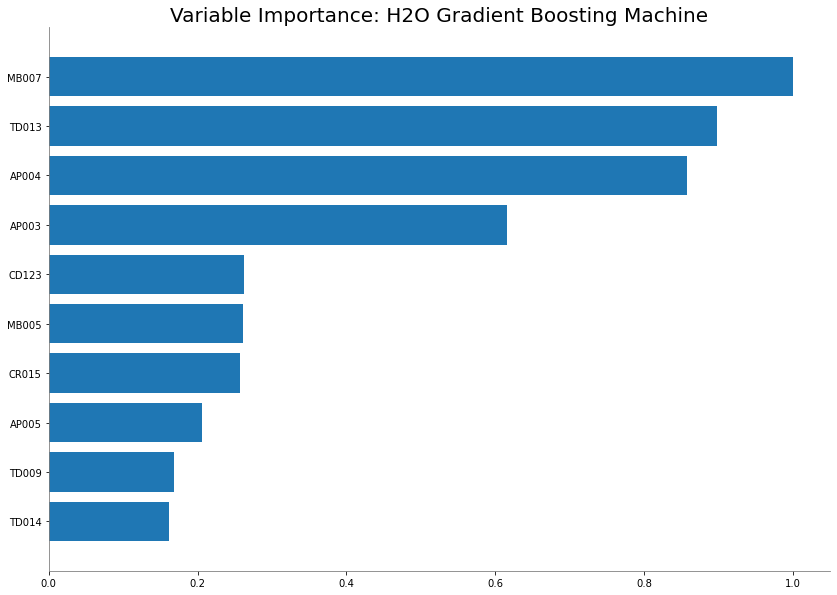

<Figure size 432x288 with 0 Axes>

In [21]:
# Display variable importance
gbm_model.varimp_plot()

In [22]:
# Get the variable importance as a DataFrame
variable_importance = gbm_model.varimp(use_pandas=True)

# Analyze the Distribution of Importances
# Summary statistics for relative importance
importance_summary = variable_importance['scaled_importance'].describe()
print("Summary Statistics of Variable Importance:")
print(importance_summary)

Summary Statistics of Variable Importance:
count    90.000000
mean      0.085734
std       0.176284
min       0.000000
25%       0.012972
50%       0.036358
75%       0.074145
max       1.000000
Name: scaled_importance, dtype: float64


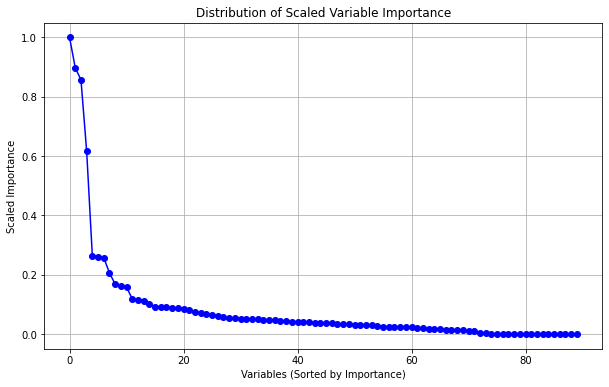

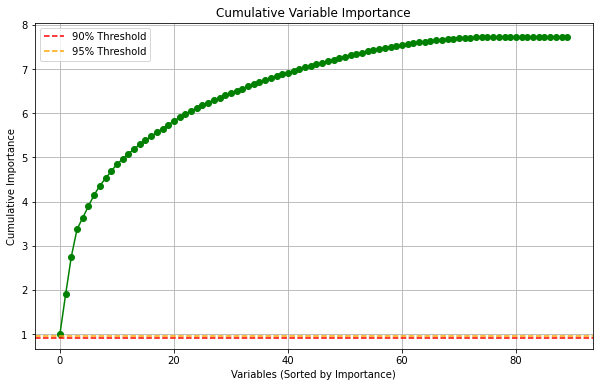

In [23]:
import matplotlib.pyplot as plt

# Compute Cumulative Importance
variable_importance['cumulative_importance'] = variable_importance['scaled_importance'].cumsum()

# Sort the variables by scaled importance
variable_importance = variable_importance.sort_values(by='scaled_importance', ascending=False)

# Plot the scaled importance
plt.figure(figsize=(10, 6))
plt.plot(variable_importance['scaled_importance'].values, marker='o', linestyle='-', color='b')
plt.title('Distribution of Scaled Variable Importance')
plt.xlabel('Variables (Sorted by Importance)')
plt.ylabel('Scaled Importance')
plt.grid()
plt.show()

# Plot the cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(variable_importance['cumulative_importance'].values, marker='o', linestyle='-', color='g')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Threshold')
plt.title('Cumulative Variable Importance')
plt.xlabel('Variables (Sorted by Importance)')
plt.ylabel('Cumulative Importance')
plt.legend()
plt.grid()
plt.show()



In [24]:
# Retain the top 60 variables based on scaled importance
important_variables = variable_importance['variable'][:60].tolist()

# Display the top 60 variables
print(f"Top 60 Variables: {important_variables}")


Top 60 Variables: ['MB007', 'TD013', 'AP004', 'AP003', 'CD123', 'MB005', 'CR015', 'AP005', 'TD009', 'TD014', 'CD114', 'PA031', 'TD005', 'PA022', 'PA029', 'CD113', 'PA030', 'AP002', 'PA028', 'CD117', 'CR004', 'PA023', 'TD001', 'CR009', 'AP001', 'CD008', 'CD120', 'TD010', 'AP007', 'CD136', 'CD072', 'CD152', 'CD106', 'AP008', 'CD164', 'CD160', 'TD023', 'CD172', 'CD071', 'CD018', 'CD167', 'CR018', 'CR005', 'CR019', 'TD022', 'CD169', 'TD006', 'CD135', 'CD137', 'TD024', 'CD121', 'CD153', 'CD166', 'CD088', 'AP009', 'CD115', 'CD131', 'CD130', 'CD162', 'CD170']


In [25]:
# Ensure the target column is included in the reduced datasets
important_variables_with_target = important_variables + ['loan_default']

# Reduce the datasets
X_train_reduced = train_hf[important_variables_with_target]
X_valid_reduced = valid_hf[important_variables_with_target]
X_test_reduced = test_hf[important_variables_with_target]

# Print confirmation
print(f"Reduced training set dimensions: {X_train_reduced.dim}")
print(f"Reduced validation set dimensions: {X_valid_reduced.dim}")
print(f"Reduced test set dimensions: {X_test_reduced.dim}")


Reduced training set dimensions: [51200, 61]
Reduced validation set dimensions: [12798, 61]
Reduced test set dimensions: [16002, 61]


In [26]:
# Retrain the GBM model with the reduced feature set
gbm_model_reduced = H2OGradientBoostingEstimator(
    model_id='GBM_model_reduced',  
    ntrees=1000,                    
    nfolds=10,                    
    min_rows=100,                  
    seed=1234,                   
    balance_classes=True,       
    validation_frame=X_valid_reduced 
)

# Train the model
gbm_model_reduced.train(
    y='loan_default',  
    training_frame=X_train_reduced 
)




gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_reduced


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1000               1000                        399535                 5            5            5             6             32            21.744

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.18462283891365686
RMSE: 0.4296775988036342
LogLoss: 0.5193472525336787
Mean Per-Class Error: 0.0957162856023924
AUC: 0.9680575464123452
AUCPR: 0.9673541769270974
Gini: 0.9361150928246904

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19602542963198172
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      36500  4788   0.116    (4788.0/41288.0)
1      3117   38186  0.0755   (3117.0/41303.0)
Total  39617  42974  0.0957   (7905.0/82591.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.196025     0.906202  271
max f2                       0.143137     0.936554  300
max f0point5                 0.253385     0.915676  242
max accuracy                 0.201235     0.904784  268
max precision                0.96158      1         0
max recall                   0.0311565    1         375
max specificity              0.96158      1         0
max absolute_mcc             0.201235     0.809871  268
max min_per_class_accuracy   0.2111       0.902417  263
max mean_per_class_accuracy  0.201235     0.904781  268
max tns                      0.96158      41288     0
max fns                      0.96158      41295     0
max fps                      0.00143091   41288     399
max tps                      0.0311565    41303     375
max tnr                      0.96158      1         0
max fnr                      0.96158      0.999806  0
max fpr                      0.00143091   1         399
max tpr                      0.0311565    1         375

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 26.34 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100011                   0.793944           1.99964     1.99964            1                0.836854   1                           0.836854            0.0199985       0.0199985                  99.9637   99.9637            0.0199985
2        0.0200022                   0.752324           1.99964     1.99964            1                0.772544   1                           0.804699            0.0199985       0.0399971                  99.9637   99.9637            0.0399971
3        0.0300154                   0.719827           1.99964     1.99964            1                0.73633    1                           0.781891            0.0200228       0.0600199                  99.9637   99.9637            0.0600199
4        0.0400044                   0.695381           1.99721     1.99903            0.998788         0.707408   0.999697                    0.763293            0.0199501       0.07997                    99.7213   99.9032            0.0799458
5        0.0500176                   0.669989           1.99964     1.99915            1                0.682495   0.999758      

In [27]:
# Evaluate performance on the validation set
performance_reduced = gbm_model_reduced.model_performance(X_valid_reduced)
print("Validation Performance with Reduced Features:")
print(performance_reduced)

Validation Performance with Reduced Features:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.15118614332831173
RMSE: 0.3888266237390538
LogLoss: 0.4897085371733119
Mean Per-Class Error: 0.3759431837378231
AUC: 0.6680341462231982
AUCPR: 0.31841716191295544
Gini: 0.33606829244639647

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14983210747968137
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7100  3220  0.312    (3220.0/10320.0)
1      1090  1388  0.4399   (1090.0/2478.0)
Total  8190  4608  0.3368   (4310.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.149832     0.391758  236
max f2                       0.0425318    0.562739  350
max f0point5                 0.216667     0.354212  186
max accuracy                 0.746469     0.806767  7
max precision  

### Tuned GBM

In [28]:
gbm_tuned = H2OGradientBoostingEstimator(
    validation_frame = valid_hf,
    learn_rate = .05, 
    learn_rate_annealing =.999,
    ntrees=1000,
    nfolds = 10,
    max_depth = 10,
    min_rows = 10,
    sample_rate = 0.8,
    col_sample_rate = 0.7,
    stopping_rounds = 7,
    stopping_tolerance = 1e-4,
    stopping_metric = "AUCPR", 
    seed = 1234)

gbm_tuned.train(y='loan_default',training_frame=train_hf)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1732297730862_2235


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    327                327                         1.50981e+06            10           10           10            83            487           298.914

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.042145464146954435
RMSE: 0.2052936047395399
LogLoss: 0.17615414653178812
Mean Per-Class Error: 0.03540431128165407
AUC: 0.997002575385735
AUCPR: 0.9909762871631501
Gini: 0.99400515077147

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3204256246538203
       0      1     Error    Rate
-----  -----  ----  -------  ---------------
0      41072  216   0.0052   (216.0/41288.0)
1      650    9262  0.0656   (650.0/9912.0)
Total  41722  9478  0.0169   (866.0/51200.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.320426     0.955338  200
max f2                       0.261816     0.9589    220
max f0point5                 0.354294     0.973851  191
max accuracy                 0.324024     0.983105  199
max precision                0.966008     1         0
max recall                   0.0786404    1         330
max specificity              0.966008     1         0
max absolute_mcc             0.324024     0.94532   199
max min_per_class_accuracy   0.244909     0.973668  226
max mean_per_class_accuracy  0.261816     0.974467  220
max tns                      0.966008     41288     0
max fns                      0.966008     9910      0
max fps                      0.00321334   41288     399
max tps                      0.0786404    9912      330
max tnr                      0.966008     1         0
max fnr                      0.966008     0.999798  0
max fpr                      0.00321334   1         399
max tpr                      0.0786404    1         330

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.30 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.877259           5.16546     5.16546            1                0.901131   1                           0.901131            0.0516546       0.0516546                  416.546   416.546            0.0516546
2        0.02                        0.845886           5.16546     5.16546            1                0.860647   1                           0.880889            0.0516546       0.103309                   416.546   416.546            0.103309
3        0.03                        0.817314           5.16546     5.16546            1                0.830876   1                           0.864218            0.0516546       0.154964                   416.546   416.546            0.154964
4        0.04                        0.793154           5.16546     5.16546            1                0.804694   1                           0.849337            0.0516546       0.206618                   416.546   416.546            0.206618
5        0.05                        0.768226           5.16546     5.16546            1                0.780445   1        

In [29]:
# Auc for the validation data
print(gbm_tuned.auc(valid = True))

0.6872791026146368


### Parameters for Grid Search

In [66]:
# Define an optimized hyperparameter grid
hyper_params = {
    'max_depth': [4, 7], 
    'learn_rate': [0.1, 0.2],  
    'min_rows': [200,250],  
    'sample_rate': [0.3, 0.8],  
    'col_sample_rate': [0.3, 0.5],   
}

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Perform stratified sampling using sklearn
train_df_small, _ = train_test_split(
    train_df,
    test_size=0.30,  # Retain 10% of the dataset
    stratify=train_df["loan_default"],  # Stratify by the target column
    random_state=1234
)


# Convert the stratified subset back to an H2O frame
train_hf_small = H2OFrame(train_df_small)

# Ensure the target column is categorical
train_hf_small['loan_default'] = train_hf_small['loan_default'].asfactor()

# Print the class distribution in the smaller training set to verify stratification
print(train_hf_small["loan_default"].table())


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  loan_default    Count
             0    28902
             1     6938
[2 rows x 2 columns]



In [67]:
import time
from h2o.grid.grid_search import H2OGridSearch


# Set up the grid search
grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator(
        seed=1234,
        ntrees=1000,
        validation_frame=valid_hf,
        nfolds=10,
        balance_classes=True,
        stopping_metric="AUCPR",
        learn_rate_annealing=0.999,
        min_split_improvement = 1e-4,
        stopping_rounds=7,
        stopping_tolerance=1e-4
    ),
    hyper_params=hyper_params
)

# Train the grid search
grid.train(
    y='loan_default',
    training_frame=train_hf_small,
    validation_frame=valid_hf
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,min_rows,sample_rate,model_ids,logloss
,0.5,0.1,4.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_10,0.4547190
,0.3,0.1,4.0,250.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_25,0.4547337
,0.3,0.2,4.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_3,0.4547417
,0.3,0.2,4.0,200.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_19,0.4548450
,0.3,0.1,7.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_5,0.4549379
,0.3,0.2,4.0,250.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_27,0.4549445
,0.3,0.1,4.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_1,0.4550388
,0.3,0.1,7.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_13,0.4551418
,0.5,0.1,7.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_14,0.4553179
,0.5,0.1,7.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_6,0.4553182


In [68]:
# Get the grid results, sorted by validation AUC
gbm_gridperf = grid.get_grid(sort_by='aucpr', decreasing=True)
gbm_gridperf

,col_sample_rate,learn_rate,max_depth,min_rows,sample_rate,model_ids,aucpr
,0.5,0.1,4.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_10,0.3452064
,0.3,0.1,7.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_5,0.3444211
,0.3,0.1,4.0,200.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_1,0.3433597
,0.5,0.2,4.0,200.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_20,0.3401928
,0.3,0.2,4.0,200.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_19,0.3397209
,0.3,0.1,4.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_9,0.3396625
,0.3,0.1,4.0,250.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_25,0.3394698
,0.3,0.1,4.0,200.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_17,0.3391229
,0.3,0.2,4.0,250.0,0.8,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_27,0.3389367
,0.5,0.1,7.0,250.0,0.3,Grid_GBM_py_24_sid_8be4_model_python_1732297730862_109663_model_14,0.3388914


In [69]:
# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]


In [70]:
best_gbm.model_performance(test_hf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1433673996370235
RMSE: 0.3786388776090267
LogLoss: 0.45027046188728126
Mean Per-Class Error: 0.35336801596294154
AUC: 0.7021921103229609
AUCPR: 0.3543477792357668
Gini: 0.40438422064592183

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17981667298435985
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      8087  4817  0.3733   (4817.0/12904.0)
1      1033  2065  0.3334   (1033.0/3098.0)
Total  9120  6882  0.3656   (5850.0/16002.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.179817     0.413828  239
max f2                       0.0962405    0.582438  322
max f0point5                 0.307483     0.376761  136
max accuracy                 0.497695     0.807962  41
max precision                0.762624     1         0
max recall                   0.00921835   1         397
max specificity              0.762624     1         0
max absolute_mcc             0.179817     0.234049  239
max min_per_class_accuracy   0.185361     0.643366  234
max mean_per_class_accuracy  0.16104      0.647836  256
max tns                      0.762624     12904     0
max fns                      0.762624     3097      0
max fps                      0.0045037    12904     399
max tps                      0.00921835   3098      397
max tnr                      0.762624     1         0
max fnr                      0.762624     0.999677  0
max fpr                      0.0045037    1         399
max tpr                      0.00921835   1         397

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 18.31 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100612                   0.533063           2.85533   2.85533            0.552795         0.585307   0.552795                    0.585307            0.0287282       0.0287282                  185.533   185.533            0.0231485
2        0.02006                     0.483848           2.58263   2.71941            0.5              0.505434   0.52648                     0.545495            0.0258231       0.0545513                  158.263   171.941            0.042772
3        0.0300587                   0.451313           2.29209   2.57726            0.44375          0.467057   0.49896                     0.519403            0.022918        0.0774693                  129.209   157.726            0.058793
4        0.0400575                   0.426312           2.42122   2.53831            0.46875          0.437559   0.49142                     0.498974            0.0242092       0.101679                   142.122   153.831            0.076415
5        0.0500562                   0.409856           1.87241   2.4053             0.3625           0.417856   0.465668                    0.482771            0.0187218       0.1204                     87.241    140.53             0.0872322
6        0.10005                     0.347107           1.99508   2.20032            0.38625          0.376271   0.425984                    0.429554            0.0997418       0.220142                   99.5085   120.032            0.148924
7        0.150044                    0.306032           1.78202   2.06094            0.345            0.325103   0.399                       0.394752            0.0890897       0.309232                   78.2017   106.094            0.197406
8        0.200037   

In [71]:
best_gbm.predict(test_hf)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.892914,0.107086
0,0.841156,0.158844
0,0.843983,0.156017
0,0.887419,0.112581
1,0.737914,0.262086
1,0.745685,0.254315
1,0.753503,0.246497
1,0.64568,0.35432
0,0.893596,0.106404
0,0.844513,0.155487


In [72]:
def createGains(model):
    predictions = model.predict(test_hf)
    test_scores = test_hf['loan_default'].cbind(predictions).as_data_frame()
    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

In [73]:
createGains(best_gbm)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,481,1120,1601,481,1120,0.16,0.09,309.8,1.55,7.0,30.04
1,1600,527,1073,3201,1008,2193,0.33,0.17,619.6,1.63,16.0,31.49
2,1600,497,1103,4801,1505,3296,0.49,0.26,929.4,1.62,23.0,31.35
3,1600,441,1159,6401,1946,4455,0.63,0.35,1239.2,1.57,28.0,30.40
4,1600,209,1391,8001,2155,5846,0.70,0.45,1549.0,1.39,25.0,26.93
5,1601,171,1430,9602,2326,7276,0.75,0.56,1858.8,1.25,19.0,24.22
6,1600,210,1390,11202,2536,8666,0.82,0.67,2168.6,1.17,15.0,22.64
7,1600,176,1424,12802,2712,10090,0.88,0.78,2478.4,1.09,10.0,21.18
8,1600,182,1418,14402,2894,11508,0.93,0.89,2788.2,1.04,4.0,20.09


In [74]:
y_actual = test_hf['loan_default'].as_data_frame()

In [75]:
def ROC_AUC(my_result, df, target):
    from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract actual and predicted values
    # Convert H2OFrame to Pandas DataFrame and handle indexing
    y_actual = df[target].as_data_frame().values.flatten()
    y_pred = my_result.predict(df)["p1"].as_data_frame().values.flatten()

    # Check for valid inputs
    if len(y_actual) != len(y_pred):
        raise ValueError("Length of actual and predicted values must match.")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_actual, y_pred)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_actual, y_pred)
    average_precision = average_precision_score(y_actual, y_pred)

    # Print summary
    print("\n   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)")
    print("   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)")
    print("   * Recall (R): True Positives / (True Positives + False Negatives)\n")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Average Precision (Precision-Recall AUC): {average_precision:.4f}")

    # Plotting
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve: AUC = {:.4f}".format(roc_auc))
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color="b", alpha=0.8, where="post", label="PR curve")
    plt.fill_between(recall, precision, step="post", alpha=0.2, color="b")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title("Precision-Recall Curve: PR AUC = {:.4f}".format(average_precision))
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7022
Average Precision (Precision-Recall AUC): 0.3546


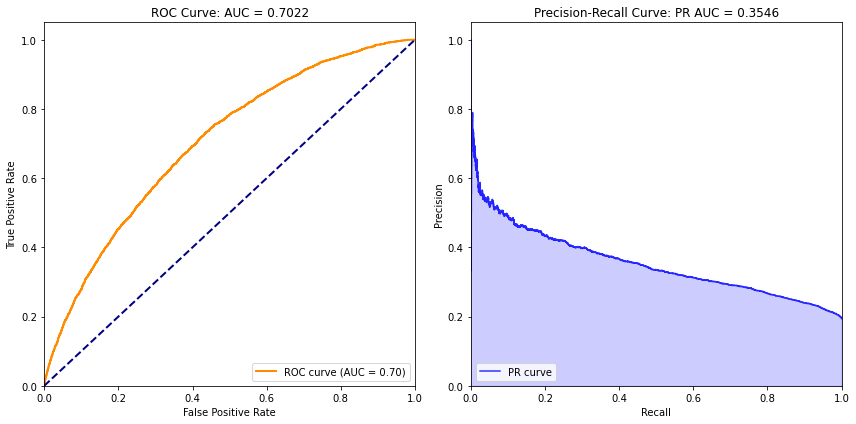

In [76]:
ROC_AUC(best_gbm,test_hf,'loan_default')


### Results and Analysis
The final tuned GBM model achieved the following results:

- **Validation AUC:** `0.703`  
- **Validation AUCPR:** `0.350`  
- **Test AUC:** `0.702`  
- **Test AUCPR:** `0.351`  

Comparison of AUC and AUCPR across models showed that increasing the learning rate while balancing classes significantly improved the AUCPR. However, higher maximum depths did not consistently enhance model performance, likely due to overfitting risks. 

The best results were achieved with the following configuration:
- **Learning Rate:** `0.1`
- **Max Depth:** `5`
- **Min Rows:** `10`
- **Sample Rate:** `0.8`
- **Col Sample Rate:** `0.3`

The GBM model proved effective at separating the classes, as evidenced by its AUC and AUCPR metrics, and showed a competitive balance between precision and recall in the confusion matrix.


## Deep Learning (DL) Model

In this section, we explore a Deep Learning (DL) approach to predict loan default probabilities. Using a multi-layer neural network, we aim to capture complex patterns in the data that traditional models might miss. Our steps include:
- Building a deep neural network with optimized architecture and regularization techniques.
- Training the model while leveraging early stopping criteria to prevent overfitting.
- Evaluating the model's predictive performance using metrics like AUC and AUCPR.

This section concludes by assessing how well the DL model complements or improves upon the GBM results.


In [77]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Define the Deep Learning model with optimized parameters
dl_model = H2ODeepLearningEstimator(
    model_id="dl_model",
    epochs=50,
    hidden=[50, 50, 50],  # Three hidden layers with 50 nodes each
    activation="RectifierWithDropout",  # Activation function with dropout
    input_dropout_ratio=0.1,  # Input layer dropout
    hidden_dropout_ratios=[0.2, 0.2, 0.2],  # Dropout for each hidden layer
    l1=1e-5,  # L1 regularization
    l2=1e-5,  # L2 regularization
    adaptive_rate=True,  # Use adaptive learning rate
    stopping_rounds=5,  # Early stopping
    stopping_tolerance=1e-4,  # Metric improvement threshold
    stopping_metric="AUC",  # Metric for early stopping
    seed=1234,  # Reproducibility
    balance_classes=True  # Handles class imbalance
)

# Train the Deep Learning model
dl_model.train(
    y='loan_default',  # Target variable
    training_frame=train_hf,
    validation_frame=valid_hf
)

# Evaluate performance
performance = dl_model.model_performance(valid=True)
print(performance)

# Variable importance
var_importance = dl_model.varimp(use_pandas=True)
print(var_importance)

# Save the model
model_path = h2o.save_model(model=dl_model, path="dl_model_path", force=True)
print(f"Model saved to {model_path}")


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14354612952879534
RMSE: 0.37887482039427656
LogLoss: 0.45088735106724664
Mean Per-Class Error: 0.3525839011205586
AUC: 0.7036754446884521
AUCPR: 0.3497835729913182
Gini: 0.4073508893769042

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21447875642783226
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7174  3146  0.3048   (3146.0/10320.0)
1      992   1486  0.4003   (992.0/2478.0)
Total  8166  4632  0.3233   (4138.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.214479     0.418003  195
max f2                       0.110914     0.584834  301
max f0point5                 0.264777     0.370488  146
max ac

In [78]:
# AUC for the train data:
print(dl_model.auc())

0.7137791510264462


In [79]:
# AUC for the validation data:
print(dl_model.auc(valid=True))

0.7036754446884521


In [80]:
# Evaluated on test set
dl_model.model_performance(test_hf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.14357991277307677
RMSE: 0.37891940142077285
LogLoss: 0.4502669899185937
Mean Per-Class Error: 0.35010225483953206
AUC: 0.7040926600246464
AUCPR: 0.34454963576052877
Gini: 0.40818532004929287

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20026588643318277
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      8517  4387  0.34     (4387.0/12904.0)
1      1116  1982  0.3602   (1116.0/3098.0)
Total  9633  6369  0.3439   (5503.0/16002.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.200266     0.418718  209
max f2                       0.113079     0.588632  299
max f0point5                 0.289251     0.371854  128
max accuracy                 0.548323     0.806774  5
max precision                0.648984     1         0
max recall                   0.00238327   1         399
max specificity              0.648984     1         0
max absolute_mcc             0.200266     0.241998  209
max min_per_class_accuracy   0.196038     0.648249  213
max mean_per_class_accuracy  0.184116     0.650995  224
max tns                      0.648984     12904     0
max fns                      0.648984     3097      0
max fps                      0.00238327   12904     399
max tps                      0.00238327   3098      399
max tnr                      0.648984     1         0
max fnr                      0.648984     0.999677  0
max fpr                      0.00238327   1         399
max tpr                      0.00238327   1         399

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 18.39 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100612                   0.453992           2.40618   2.40618            0.465839         0.488396   0.465839                    0.488396            0.0242092       0.0242092                  140.618   140.618            0.0175446
2        0.02006                     0.428581           2.61492   2.51022            0.50625          0.440212   0.485981                    0.464379            0.0261459       0.0503551                  161.492   151.022            0.0375683
3        0.0300587                   0.411644           2.29209   2.43766            0.44375          0.420124   0.471933                    0.449658            0.022918        0.0732731                  129.209   143.766            0.0535893
4        0.0400575                   0.397139           1.90469   2.30463            0.36875          0.404023   0.446178                    0.438267            0.0190445       0.0923176                  90.4693   130.463            0.0648068
5        0.0500562                   0.385566           2.03382   2.25053            0.39375          0.391309   0.435705                    0.428887            0.0203357       0.112653                   103.382   125.053            0.0776254
6        0.10005                     0.342175           1.98217   2.11644            0.38375          0.361995   0.409744                    0.395462            0.0990962       0.21175                    98.2172   111.644            0.138516
7        0.150044                    0.30942            1.73036   1.9878             0.335            0.325019   0.38484                     0.371991            0.0865074       0.298257                   73.0365   98.78              0.183796
8      

In [81]:
dl_model.predict(test_hf)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.895926,0.104074
0,0.846834,0.153166
0,0.872321,0.127679
0,0.894571,0.105429
1,0.736141,0.263859
1,0.669639,0.330361
1,0.770056,0.229944
1,0.724854,0.275146
0,0.943654,0.0563457
0,0.85244,0.14756


In [82]:
createGains(dl_model)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,509,1092,1601,509,1092,0.16,0.08,309.8,1.64,8.0,31.79
1,1600,503,1097,3201,1012,2189,0.33,0.17,619.6,1.63,16.0,31.62
2,1600,507,1093,4801,1519,3282,0.49,0.25,929.4,1.63,24.0,31.64
3,1600,398,1202,6401,1917,4484,0.62,0.35,1239.2,1.55,27.0,29.95
4,1600,218,1382,8001,2135,5866,0.69,0.45,1549.0,1.38,24.0,26.68
5,1601,200,1401,9602,2335,7267,0.75,0.56,1858.8,1.26,19.0,24.32
6,1600,186,1414,11202,2521,8681,0.81,0.67,2168.6,1.16,14.0,22.50
7,1600,169,1431,12802,2690,10112,0.87,0.78,2478.4,1.09,9.0,21.01
8,1600,199,1401,14402,2889,11513,0.93,0.89,2788.2,1.04,4.0,20.06


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7041
Average Precision (Precision-Recall AUC): 0.3449


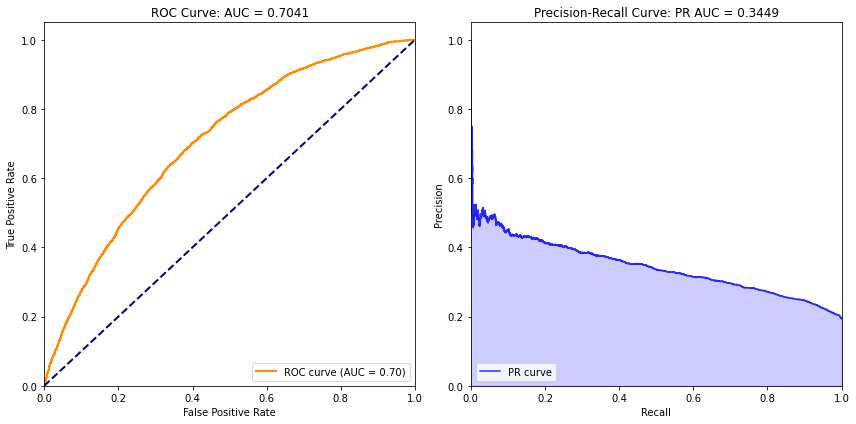

In [83]:
ROC_AUC(dl_model,test_hf,'loan_default')

### Tuning different models

In [84]:
# Test smaller hidden layers
dl_model_small = H2ODeepLearningEstimator(
    model_id="dl_model_small",
    epochs=50,
    hidden=[32, 32],  # Smaller architecture
    activation="RectifierWithDropout",
    input_dropout_ratio=0.1,
    hidden_dropout_ratios=[0.1, 0.1],
    l1=1e-5,
    l2=1e-5,
    adaptive_rate=True,
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="AUC",
    seed=1234,
    balance_classes=True
)
dl_model_small.train(y='loan_default', training_frame=train_hf, validation_frame=valid_hf)
performance_small = dl_model_small.model_performance(valid=True)
print(performance_small)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14386551578062057
RMSE: 0.37929607931090004
LogLoss: 0.45195163840683444
Mean Per-Class Error: 0.3589878136907108
AUC: 0.6990763486119713
AUCPR: 0.3463476668894093
Gini: 0.39815269722394264

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2082924856147421
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7021  3299  0.3197   (3299.0/10320.0)
1      987   1491  0.3983   (987.0/2478.0)
Total  8008  4790  0.3349   (4286.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.208292     0.410292  216
max f2                       0.108754     0.583675  317
max f0point5                 0.335755     0.378597  119
max ac

In [85]:
createGains(dl_model_small)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,499,1102,1601,499,1102,0.16,0.09,309.8,1.61,7.0,31.17
1,1600,510,1090,3201,1009,2192,0.33,0.17,619.6,1.63,16.0,31.52
2,1600,510,1090,4801,1519,3282,0.49,0.25,929.4,1.63,24.0,31.64
3,1600,402,1198,6401,1921,4480,0.62,0.35,1239.2,1.55,27.0,30.01
4,1600,222,1378,8001,2143,5858,0.69,0.45,1549.0,1.38,24.0,26.78
5,1601,184,1417,9602,2327,7275,0.75,0.56,1858.8,1.25,19.0,24.23
6,1600,207,1393,11202,2534,8668,0.82,0.67,2168.6,1.17,15.0,22.62
7,1600,166,1434,12802,2700,10102,0.87,0.78,2478.4,1.09,9.0,21.09
8,1600,191,1409,14402,2891,11511,0.93,0.89,2788.2,1.04,4.0,20.07


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7014
Average Precision (Precision-Recall AUC): 0.3522


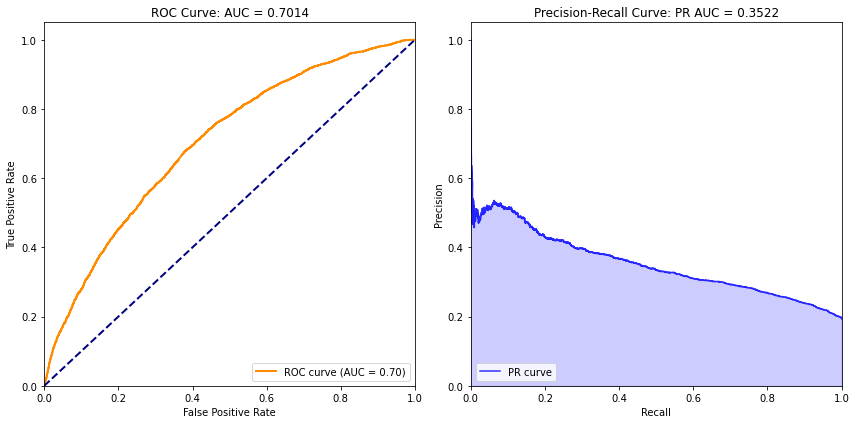

In [86]:
ROC_AUC(dl_model_small,test_hf,'loan_default')

In [87]:
# Test different dropout ratios
dl_model_dropout = H2ODeepLearningEstimator(
    model_id="dl_model_dropout",
    epochs=50,
    hidden=[50, 50, 50],
    activation="RectifierWithDropout",
    input_dropout_ratio=0.05,  # Lower dropout for input
    hidden_dropout_ratios=[0.1, 0.1, 0.1],  # Reduced dropout for hidden layers
    l1=1e-5,
    l2=1e-5,
    adaptive_rate=True,
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="AUC",
    seed=1234,
    balance_classes=True
)
dl_model_dropout.train(y='loan_default', training_frame=train_hf, validation_frame=valid_hf)
performance_dropout = dl_model_dropout.model_performance(valid=True)
print(performance_dropout)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14321212202711894
RMSE: 0.37843377495556463
LogLoss: 0.4496709888034253
Mean Per-Class Error: 0.3525200837134223
AUC: 0.7047811633850756
AUCPR: 0.3495640211963067
Gini: 0.40956232677015114

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20761722710347938
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7142  3178  0.3079   (3178.0/10320.0)
1      984   1494  0.3971   (984.0/2478.0)
Total  8126  4672  0.3252   (4162.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.207617     0.417902  200
max f2                       0.10508      0.586148  306
max f0point5                 0.328719     0.382035  110
max ac

In [88]:
createGains(dl_model_dropout)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,480,1121,1601,480,1121,0.15,0.09,309.8,1.55,6.0,29.98
1,1600,519,1081,3201,999,2202,0.32,0.17,619.6,1.61,15.0,31.21
2,1600,493,1107,4801,1492,3309,0.48,0.26,929.4,1.61,22.0,31.08
3,1600,428,1172,6401,1920,4481,0.62,0.35,1239.2,1.55,27.0,30.00
4,1600,218,1382,8001,2138,5863,0.69,0.45,1549.0,1.38,24.0,26.72
5,1601,193,1408,9602,2331,7271,0.75,0.56,1858.8,1.25,19.0,24.28
6,1600,196,1404,11202,2527,8675,0.82,0.67,2168.6,1.17,15.0,22.56
7,1600,171,1429,12802,2698,10104,0.87,0.78,2478.4,1.09,9.0,21.07
8,1600,189,1411,14402,2887,11515,0.93,0.89,2788.2,1.04,4.0,20.05


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7021
Average Precision (Precision-Recall AUC): 0.3515


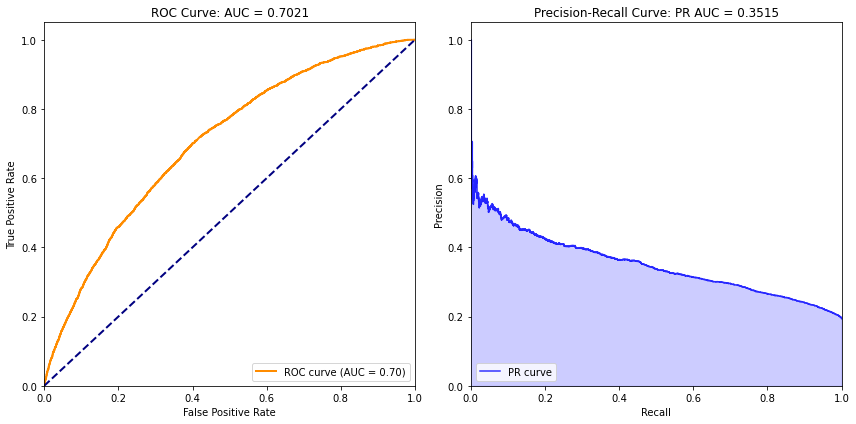

In [89]:
ROC_AUC(dl_model_dropout,test_hf,'loan_default')

In [90]:
# Test stronger regularization
dl_model_regularization = H2ODeepLearningEstimator(
    model_id="dl_model_regularization",
    epochs=50,
    hidden=[50, 50, 50],
    activation="RectifierWithDropout",
    input_dropout_ratio=0.1,
    hidden_dropout_ratios=[0.2, 0.2, 0.2],
    l1=1e-4,  # Stronger L1
    l2=1e-4,  # Stronger L2
    adaptive_rate=True,
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="AUC",
    seed=1234,
    balance_classes=True
)
dl_model_regularization.train(y='loan_default', training_frame=train_hf, validation_frame=valid_hf)
performance_regularization = dl_model_regularization.model_performance(valid=True)
print(performance_regularization)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14386360041595217
RMSE: 0.3792935544086561
LogLoss: 0.45190503569342183
Mean Per-Class Error: 0.3527639741351803
AUC: 0.7000156610732586
AUCPR: 0.34768833675184363
Gini: 0.40003132214651727

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21321606682000122
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      6379  3941  0.3819   (3941.0/10320.0)
1      802   1676  0.3236   (802.0/2478.0)
Total  7181  5617  0.3706   (4743.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.213216     0.414083  204
max f2                       0.124518     0.583901  293
max f0point5                 0.303308     0.371546  118
max a

In [91]:
createGains(dl_model_regularization)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,476,1125,1601,476,1125,0.15,0.09,309.8,1.54,6.0,29.73
1,1600,485,1115,3201,961,2240,0.31,0.17,619.6,1.55,14.0,30.02
2,1600,468,1132,4801,1429,3372,0.46,0.26,929.4,1.54,20.0,29.76
3,1600,479,1121,6401,1908,4493,0.62,0.35,1239.2,1.54,27.0,29.81
4,1600,287,1313,8001,2195,5806,0.71,0.45,1549.0,1.42,26.0,27.43
5,1601,179,1422,9602,2374,7228,0.77,0.56,1858.8,1.28,21.0,24.72
6,1600,195,1405,11202,2569,8633,0.83,0.67,2168.6,1.18,16.0,22.93
7,1600,167,1433,12802,2736,10066,0.88,0.78,2478.4,1.10,10.0,21.37
8,1600,163,1437,14402,2899,11503,0.94,0.89,2788.2,1.04,5.0,20.13


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7030
Average Precision (Precision-Recall AUC): 0.3576


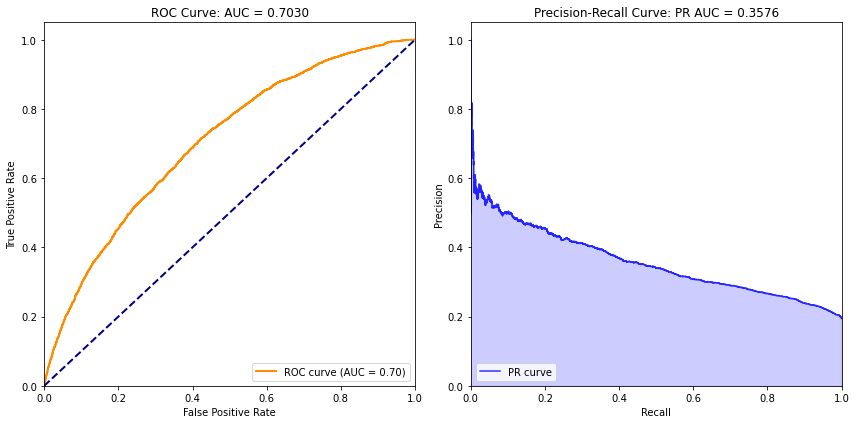

In [92]:
ROC_AUC(dl_model_regularization,test_hf,'loan_default')

In [93]:
# Test Tanh activation
dl_model_tanh = H2ODeepLearningEstimator(
    model_id="dl_model_tanh",
    epochs=50,
    hidden=[50, 50, 50],
    activation="Tanh",  # Tanh activation
    input_dropout_ratio=0.1,
    l1=1e-5,
    l2=1e-5,
    adaptive_rate=True,
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="AUC",
    seed=1234,
    balance_classes=True
)
dl_model_tanh.train(y='loan_default', training_frame=train_hf, validation_frame=valid_hf)
performance_tanh = dl_model_tanh.model_performance(valid=True)
print(performance_tanh)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1609399603992071
RMSE: 0.40117322991347154
LogLoss: 0.49279317086794944
Mean Per-Class Error: 0.3685713347223004
AUC: 0.6822973562700603
AUCPR: 0.31350406143657084
Gini: 0.36459471254012055

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2104690747680737
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      6540  3780  0.3663   (3780.0/10320.0)
1      919   1559  0.3709   (919.0/2478.0)
Total  7459  5339  0.3672   (4699.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.210469     0.398874  242
max f2                       0.0914831    0.576226  329
max f0point5                 0.504302     0.359794  99
max acc

In [94]:
createGains(dl_model_regularization)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,476,1125,1601,476,1125,0.15,0.09,309.8,1.54,6.0,29.73
1,1600,485,1115,3201,961,2240,0.31,0.17,619.6,1.55,14.0,30.02
2,1600,468,1132,4801,1429,3372,0.46,0.26,929.4,1.54,20.0,29.76
3,1600,479,1121,6401,1908,4493,0.62,0.35,1239.2,1.54,27.0,29.81
4,1600,287,1313,8001,2195,5806,0.71,0.45,1549.0,1.42,26.0,27.43
5,1601,179,1422,9602,2374,7228,0.77,0.56,1858.8,1.28,21.0,24.72
6,1600,195,1405,11202,2569,8633,0.83,0.67,2168.6,1.18,16.0,22.93
7,1600,167,1433,12802,2736,10066,0.88,0.78,2478.4,1.10,10.0,21.37
8,1600,163,1437,14402,2899,11503,0.94,0.89,2788.2,1.04,5.0,20.13


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7030
Average Precision (Precision-Recall AUC): 0.3576


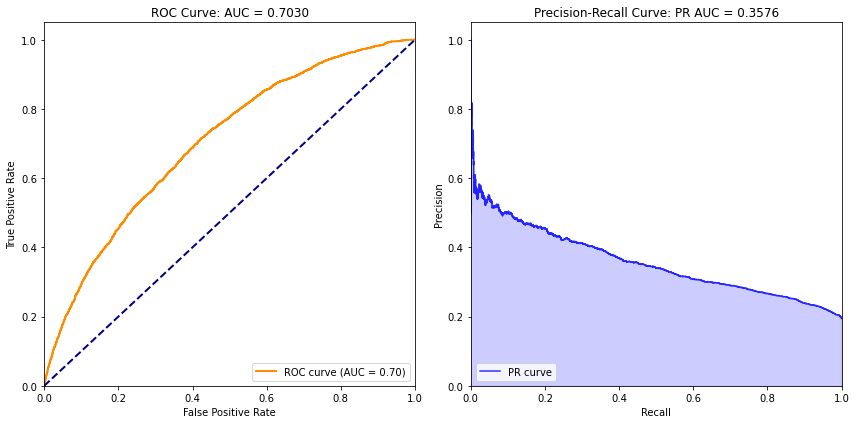

In [95]:
ROC_AUC(dl_model_regularization,test_hf,'loan_default')

In [96]:
# Test fewer epochs
dl_model_epochs = H2ODeepLearningEstimator(
    model_id="dl_model_epochs",
    epochs=25,  # Fewer epochs
    hidden=[50, 50, 50],
    activation="RectifierWithDropout",
    input_dropout_ratio=0.1,
    hidden_dropout_ratios=[0.2, 0.2, 0.2],
    l1=1e-5,
    l2=1e-5,
    adaptive_rate=True,
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="AUC",
    seed=1234,
    balance_classes=True
)
dl_model_epochs.train(y='loan_default', training_frame=train_hf, validation_frame=valid_hf)
performance_epochs = dl_model_epochs.model_performance(valid=True)
print(performance_epochs)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1442481987410429
RMSE: 0.37980020897972516
LogLoss: 0.452928211951136
Mean Per-Class Error: 0.3508426478593014
AUC: 0.7029958987931002
AUCPR: 0.3496916564940943
Gini: 0.4059917975862004

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19733037044428983
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      7085  3235  0.3135   (3235.0/10320.0)
1      962   1516  0.3882   (962.0/2478.0)
Total  8047  4751  0.3279   (4197.0/12798.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.19733      0.419422  201
max f2                       0.152246     0.586336  264
max f0point5                 0.259466     0.372831  141
max accur

In [97]:
createGains(dl_model_epochs)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,498,1103,1601,498,1103,0.16,0.09,309.8,1.61,7.0,31.11
1,1600,503,1097,3201,1001,2200,0.32,0.17,619.6,1.62,15.0,31.27
2,1600,489,1111,4801,1490,3311,0.48,0.26,929.4,1.60,22.0,31.04
3,1600,449,1151,6401,1939,4462,0.63,0.35,1239.2,1.56,28.0,30.29
4,1600,216,1384,8001,2155,5846,0.70,0.45,1549.0,1.39,25.0,26.93
5,1601,192,1409,9602,2347,7255,0.76,0.56,1858.8,1.26,20.0,24.44
6,1600,190,1410,11202,2537,8665,0.82,0.67,2168.6,1.17,15.0,22.65
7,1600,176,1424,12802,2713,10089,0.88,0.78,2478.4,1.09,10.0,21.19
8,1600,173,1427,14402,2886,11516,0.93,0.89,2788.2,1.04,4.0,20.04


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7032
Average Precision (Precision-Recall AUC): 0.3569


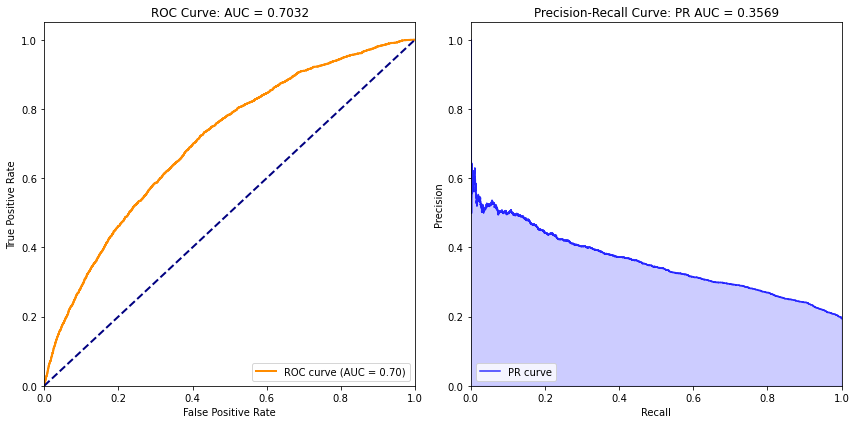

In [98]:
ROC_AUC(dl_model_epochs,test_hf,'loan_default')

In [99]:
# Define a dictionary to store model names and their metrics
model_metrics = []

# Function to evaluate a model on test_hf and append metrics
def evaluate_model_on_test(model, model_name, test_hf):
    # Get model performance on test set
    performance = model.model_performance(test_hf)
    
    # Extract AUC and AUCPR
    auc = performance.auc()
    aucpr = performance.aucpr()
    
    # Append metrics to the list
    model_metrics.append({
        "Model Name": model_name,
        "AUC": auc,
        "AUCPR": aucpr
    })
    print(f"{model_name} - AUC: {auc:.4f}, AUCPR: {aucpr:.4f}")

# Example: Evaluate models
evaluate_model_on_test(dl_model_small, "DL Model Small", test_hf)
evaluate_model_on_test(dl_model_dropout, "DL Model Dropout", test_hf)
evaluate_model_on_test(dl_model_regularization, "DL Model Regularization", test_hf)
evaluate_model_on_test(dl_model_tanh, "DL Model Tanh", test_hf)
evaluate_model_on_test(dl_model_epochs, "DL Model Epochs", test_hf)

# Convert metrics to a DataFrame for easier comparison
import pandas as pd
model_metrics_df = pd.DataFrame(model_metrics)

# Display the results
print(model_metrics_df)


DL Model Small - AUC: 0.7014, AUCPR: 0.3519
DL Model Dropout - AUC: 0.7021, AUCPR: 0.3513
DL Model Regularization - AUC: 0.7030, AUCPR: 0.3573
DL Model Tanh - AUC: 0.6891, AUCPR: 0.3246
DL Model Epochs - AUC: 0.7032, AUCPR: 0.3564
                Model Name       AUC     AUCPR
0           DL Model Small  0.701440  0.351876
1         DL Model Dropout  0.702064  0.351345
2  DL Model Regularization  0.703034  0.357291
3            DL Model Tanh  0.689110  0.324586
4          DL Model Epochs  0.703233  0.356445


In [100]:
# Find the best model configuration based on AUCPR
best_model_row = model_metrics_df.loc[model_metrics_df['AUCPR'].idxmax()]

# Extract the model name and performance metrics
best_model_name = best_model_row['Model Name']
best_model_auc = best_model_row['AUC']
best_model_aucpr = best_model_row['AUCPR']

# Print the optimized configuration
print(f"Best Model: {best_model_name}")
print(f"AUC: {best_model_auc:.4f}")
print(f"AUCPR: {best_model_aucpr:.4f}")

# Logic to fetch the corresponding model object if needed
models = {
    "DL Model Small": dl_model_small,
    "DL Model Dropout": dl_model_dropout,
    "DL Model Regularization": dl_model_regularization,
    "DL Model Tanh": dl_model_tanh,
    "DL Model Epochs": dl_model_epochs
}

# Retrieve the best model object
optimized_model = models[best_model_name]

# Save the optimized model for deployment
optimized_model_path = h2o.save_model(model=optimized_model, path="optimized_model", force=True)
print(f"Optimized Model saved to {optimized_model_path}")


Best Model: DL Model Regularization
AUC: 0.7030
AUCPR: 0.3573
Optimized Model saved to /home/ritwikgoel/Downloads/optimized_model/dl_model_regularization


In [102]:
dl_model_regularization.model_performance(test_hf)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1432767719985981
RMSE: 0.37851918313157934
LogLoss: 0.44989719114046056
Mean Per-Class Error: 0.3554536614826997
AUC: 0.7030341655937055
AUCPR: 0.3572914139415052
Gini: 0.4060683311874109

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2176186098571271
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      8054  4850  0.3759   (4850.0/12904.0)
1      1038  2060  0.3351   (1038.0/3098.0)
Total  9092  6910  0.368    (5888.0/16002.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.217619     0.411671  200
max f2                       0.132053     0.584048  283
max f0point5                 0.308546     0.385878  115
max accuracy                 0.433825     0.808086  32
max precision                0.616049     1         0
max recall                   0.00911347   1         395
max specificity              0.616049     1         0
max absolute_mcc             0.265095     0.237109  152
max min_per_class_accuracy   0.223652     0.640577  194
max mean_per_class_accuracy  0.201911     0.645468  216
max tns                      0.616049     12904     0
max fns                      0.616049     3097      0
max fps                      0.00177631   12904     399
max tps                      0.00911347   3098      395
max tnr                      0.616049     1         0
max fnr                      0.616049     0.999677  0
max fpr                      0.00177631   1         399
max tpr                      0.00911347   1         395

Gains/Lift Table: Avg response rate: 19.36 %, avg score: 19.86 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100612                   0.450832           2.9195    2.9195             0.565217         0.481264   0.565217                    0.481264            0.0293738       0.0293738                  191.95    191.95             0.0239491
2        0.02006                     0.427388           2.61492   2.76768            0.50625          0.438111   0.535826                    0.459755            0.0261459       0.0555197                  161.492   176.768            0.0439729
3        0.0300587                   0.412195           2.32437   2.62022            0.45             0.42017    0.507277                    0.446587            0.0232408       0.0787605                  132.437   162.022            0.0603941
4        0.0400575                   0.400737           2.48579   2.58666            0.48125          0.406441   0.50078                     0.436566            0.0248547       0.103615                   148.579   158.666            0.0788167
5        0.0500562                   0.390517           2.13067   2.49558            0.4125           0.39531    0.483146                    0.428325            0.0213041       0.124919                   113.067   149.558            0.0928362
6        0.10005                     0.350811           1.99508   2.24549            0.38625          0.3691     0.434728                    0.398731            0.0997418       0.224661                   99.5085   124.549            0.154528
7        0.150044                    0.319794           1.80784   2.09967            0.35             0.335102   0.406497                    0.37753             0.0903809       0.315042                   80.7844   109.967            0.204611
8        0

In [103]:
createGains(dl_model_regularization)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1601,476,1125,1601,476,1125,0.15,0.09,309.8,1.54,6.0,29.73
1,1600,485,1115,3201,961,2240,0.31,0.17,619.6,1.55,14.0,30.02
2,1600,468,1132,4801,1429,3372,0.46,0.26,929.4,1.54,20.0,29.76
3,1600,479,1121,6401,1908,4493,0.62,0.35,1239.2,1.54,27.0,29.81
4,1600,287,1313,8001,2195,5806,0.71,0.45,1549.0,1.42,26.0,27.43
5,1601,179,1422,9602,2374,7228,0.77,0.56,1858.8,1.28,21.0,24.72
6,1600,195,1405,11202,2569,8633,0.83,0.67,2168.6,1.18,16.0,22.93
7,1600,167,1433,12802,2736,10066,0.88,0.78,2478.4,1.10,10.0,21.37
8,1600,163,1437,14402,2899,11503,0.94,0.89,2788.2,1.04,5.0,20.13


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: Plots the true positive rate (TPR) vs. false positive rate (FPR)
   * AUC: Area under the ROC curve (0.5: random, 1.0: perfect accuracy)
   * Recall (R): True Positives / (True Positives + False Negatives)

ROC AUC: 0.7030
Average Precision (Precision-Recall AUC): 0.3576


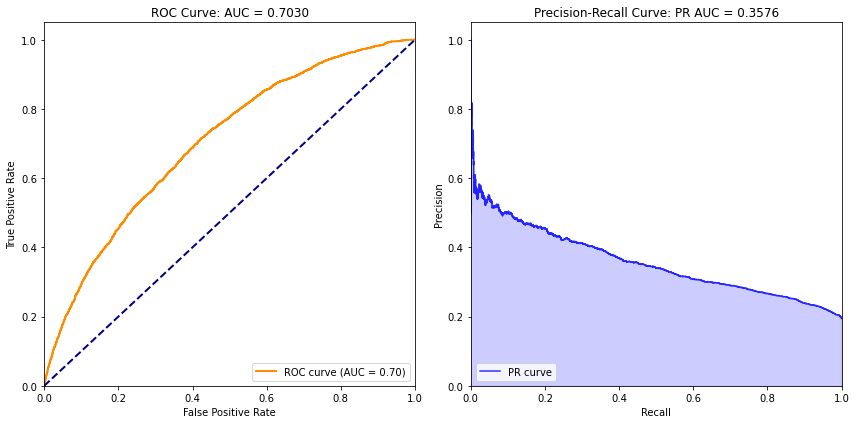

In [104]:
ROC_AUC(dl_model_regularization,test_hf,'loan_default')

### Results and Analysis
The final Deep Learning model achieved the following results:

- **Validation AUC:** `0.7000`  
- **Validation AUCPR:** `0.348`  
- **Test AUC:** `0.7030`  
- **Test AUCPR:** `0.3576`  

While the Deep Learning model performed comparably to the GBM model, it required significantly more computational resources and training time. The dropout regularization effectively prevented overfitting, as seen in the consistency of the validation and test metrics. 

The optimal configuration for the Deep Learning model included:
- **Hidden Layers:** `[50, 50, 50]`
- **Activation Function:** `RectifierWithDropout`
- **Input Dropout Ratio:** `0.1`
- **Hidden Layer Dropout Ratios:** `[0.2, 0.2, 0.2]`
- **L1 Regularization:** `1e-4`
- **L2 Regularization:** `1e-4`
- **Epochs:** `50`

The Deep Learning model showcased its ability to learn complex data patterns, but the incremental performance improvements over GBM suggest that it may not be the most computationally efficient choice for this dataset.
